# Домашнее задание к лекции "Функции и работа с данными"

## Задание 1

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [1]:
import pandas as pd

DataSet   http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

from      https://grouplens.org/datasets/movielens/latest/

In [2]:
rating_df = pd.read_csv('ml-latest-small/ratings.csv')
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
def classify(rating):
    if rating <= 2.:
        return 'low'
    elif rating <= 4.:
        return 'medium'  
    return 'high'
    
# test = pd.DataFrame({'rating': [1., 4., 4.5]})    
# test['class'] = test.rating.apply(classify)
# test

rating_df['class'] =  rating_df['rating'].apply(classify)
display(rating_df.head())
display(rating_df['class'].value_counts())
    

,userId,movieId,rating,timestamp,class
0,1,1,4.0,964982703,medium
1,1,3,4.0,964981247,medium
2,1,6,4.0,964982224,medium
3,1,47,5.0,964983815,high
4,1,50,5.0,964982931,high


medium    65551
high      21762
low       13523
Name: class, dtype: int64

## Задание 2

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [4]:
keywords_df = pd.read_csv('keywords.csv')
geo_data = {'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск'] 
           }

In [5]:
%%time
def geo_classify(df):
    for region, cities in geo_data.items():
        for city in cities:
            if city in df.keyword:
                return region
    return 'undefined'


keywords_df['region'] = keywords_df.apply(geo_classify, axis=1)
display(keywords_df[keywords_df.region.str.contains('Центр|Северо-Запад|Дальний Восток',regex=True)].head())
keywords_df.region.value_counts()

,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
564,погода в санкт петербурге,292489,Северо-Запад
849,авито ярославль,209581,Центр
1063,фарпост владивосток,176951,Дальний Восток


Wall time: 28.4 s


undefined         99253
Центр               387
Северо-Запад        266
Дальний Восток       94
Name: region, dtype: int64

In [6]:
%%time

  
def geo_classify2(kw):
    if geo_data['Центр'][0] in kw or geo_data['Центр'][1] in kw or geo_data['Центр'][2] in kw:    
         return 'Центр'
    if geo_data['Северо-Запад'][0] in kw or geo_data['Северо-Запад'][1] in kw or geo_data['Северо-Запад'][2] in kw:
        return 'Северо-Запад'
    if geo_data['Дальний Восток'][0] in kw or geo_data['Дальний Восток'][1] in kw or geo_data['Дальний Восток'][2] in kw:
        return 'Дальний Восток'
    return 'undefined'

keywords_df['region'] = keywords_df.keyword.apply(geo_classify2)
    
display(keywords_df[keywords_df.region.str.contains('Центр|Северо-Запад|Дальний Восток',regex=True)].head())
keywords_df.region.value_counts()
    

,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
564,погода в санкт петербурге,292489,Северо-Запад
849,авито ярославль,209581,Центр
1063,фарпост владивосток,176951,Дальний Восток


Wall time: 440 ms


undefined         99253
Центр               387
Северо-Запад        266
Дальний Восток       94
Name: region, dtype: int64

## Задание 3 

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

    - для каждой строки пройдите по всем годам списка years
    - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
    - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
1. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

3. Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [7]:
# 0. Prepare dataframes
movies_df = pd.read_csv('ml-latest-small/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
# 1. years list
years = list(map(str,range(1950, 2011)))
# years

In [9]:
# 2. 
def production_year(name):
    for year in years:
        if year in name:
            return int(year)    
    return 1900

In [10]:
# 3.
movies_df['year'] = movies_df.title.apply(production_year)
movies_df.head()
movies_df.year.value_counts()

1900    2076
2002     310
2006     296
2001     295
2007     284
        ... 
1956      30
1954      23
1951      22
1950      21
1952      16
Name: year, Length: 62, dtype: int64

In [11]:
# again 0: dataframe with movies year + raitings 
rating_df = pd.read_csv('ml-latest-small/ratings.csv')
movie_data = rating_df.merge(movies_df, on='movieId', how='left')
movie_data

,userId,movieId,rating,timestamp,title,genres,year
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,1995
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,1995
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995
...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,1900
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,1900
100833,610,168250,5.0,1494273047,Get Out (2017),Horror,1900
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,1900


In [12]:
# 4.
rating_year = movie_data.groupby('year').agg({'rating':'mean'}).sort_values(by='rating', ascending=False).head()
display(rating_year)

,rating
year,
1957,4.039535
1954,4.009191
1962,3.969466
1952,3.953125
1972,3.944293


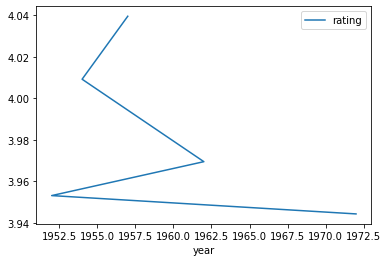

In [13]:
%matplotlib inline
rating_year.plot()